In [17]:
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

import numpy as np
import pandas as pd
import networkx as nx

import meshio

In [13]:
mesh_file = "meshes/hole_middle_test.inp"
csv_file = "data/test_data.csv"

mesh = meshio.read(mesh_file)
df = pd.read_csv(csv_file, sep=',', skipinitialspace=True)

In [14]:
nodes = mesh.points
von_miss = df["Equivalent Stress"].values
deform_x = df["Deformation X"].values
deform_y = df["Deformation Y"].values
stress_x = df["Stress X"].values
stress_y = df["Stress Y"].values
shear = df["Shear"].values

In [54]:
print(nodes[:, :2])

tensor([[0.0000, 0.0000],
        [2.0000, 0.0000],
        [2.0000, 1.0000],
        ...,
        [1.0344, 0.2917],
        [0.7438, 0.6560],
        [1.0767, 0.4187]])


In [ ]:
node_features = torch.tensor(von_miss, dtype=torch.float).view(-1, 1)


edges = []
for cell in mesh.cells:
    if cell.type == "triangle":
        for element in cell.data:
            edges.append([element[0], element[1]])
            edges.append([element[1], element[0]])

            edges.append([element[1], element[2]])
            edges.append([element[2], element[1]])

            edges.append([element[2], element[0]])
            edges.append([element[0], element[2]])

edges = torch.tensor(edges, dtype=torch.long).t().contiguous()
pos = torch.tensor(nodes, dtype=torch.float)

data = Data(x=node_features, edge_index=edges, pos=pos)
print(data)

Data(x=[14925, 1], edge_index=[2, 175476], pos=[14925, 3])


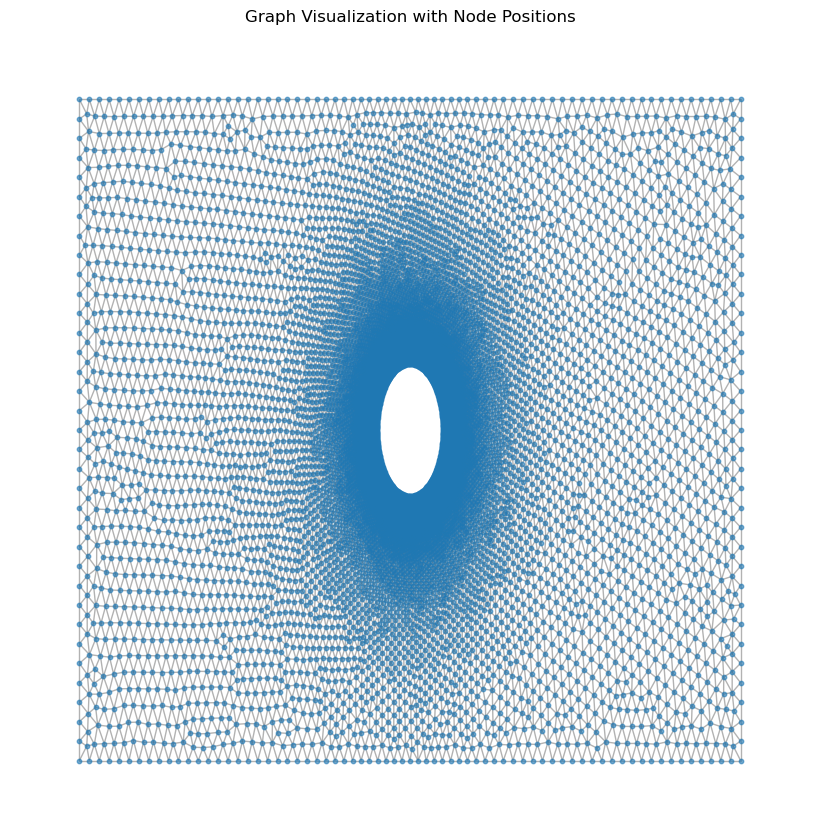

In [ ]:
G = to_networkx(data, to_undirected=True)

pos = {i: (data.pos[i, 0].item(), data.pos[i, 1].item()) for i in range(data.pos.shape[0])}

plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=10, edge_color="gray", alpha=0.6)
plt.title("Graph Visualization with Node Positions")
plt.show()

In [47]:
# For example, if you built your mapping when reading the CSV:
nodeid_to_index = {int(row["Node ID"]): idx for idx, row in df.iterrows()}

print(nodeid_to_index)

bc_data = mesh.point_sets
wall_left = bc_data["wall_left"]

print(wall_left)

left = data.pos[wall_left]

x = left[:, 0].detach().numpy()
y = left[:, 1].detach().numpy()


{1: 0, 2: 1, 3: 2, 4: 3, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8, 11: 9, 12: 10, 13: 11, 14: 12, 15: 13, 16: 14, 17: 15, 18: 16, 19: 17, 20: 18, 21: 19, 22: 20, 23: 21, 24: 22, 25: 23, 26: 24, 27: 25, 28: 26, 29: 27, 30: 28, 31: 29, 32: 30, 33: 31, 34: 32, 35: 33, 36: 34, 37: 35, 38: 36, 39: 37, 40: 38, 41: 39, 42: 40, 43: 41, 44: 42, 45: 43, 46: 44, 47: 45, 48: 46, 49: 47, 50: 48, 51: 49, 52: 50, 53: 51, 54: 52, 55: 53, 56: 54, 57: 55, 58: 56, 59: 57, 60: 58, 61: 59, 62: 60, 63: 61, 64: 62, 65: 63, 66: 64, 67: 65, 68: 66, 69: 67, 70: 68, 71: 69, 72: 70, 73: 71, 74: 72, 75: 73, 76: 74, 77: 75, 78: 76, 79: 77, 80: 78, 81: 79, 82: 80, 83: 81, 84: 82, 85: 83, 86: 84, 87: 85, 88: 86, 89: 87, 90: 88, 91: 89, 92: 90, 93: 91, 94: 92, 95: 93, 96: 94, 97: 95, 98: 96, 99: 97, 100: 98, 101: 99, 102: 100, 103: 101, 104: 102, 105: 103, 106: 104, 107: 105, 108: 106, 109: 107, 110: 108, 111: 109, 112: 110, 113: 111, 114: 112, 115: 113, 116: 114, 117: 115, 118: 116, 119: 117, 120: 118, 121: 119, 122: 120, 123: 

35


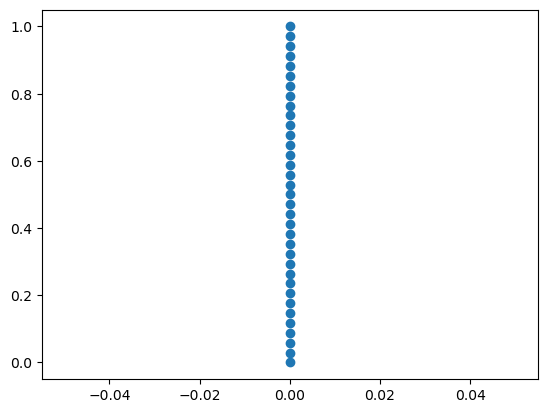

In [49]:
plt.scatter(x,y)
print(len(x))